In [8]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
imm = pd.read_excel('Data/Total_immigration_by_year.xlsx') 
imm.set_index('Year', inplace = True) #set index as year
imm.index= imm.index.astype(str) #change to str for date time format
imm.index = pd.to_datetime(imm.index)

In [3]:
by_year_df = pd.read_csv('pop_all.csv')
by_year_df.index= imm.index
total_immigration = by_year_df['Pop_Perc'].to_frame()
total_immigration.head()

,Pop_Perc
Year,
1820-01-01,0.000872
1821-01-01,0.000922
1822-01-01,0.000678
1823-01-01,0.000606
1824-01-01,0.000733


In [4]:
type(total_immigration)

pandas.core.frame.DataFrame

# Initial Plot of Immigrants as Percentage of US Pop (1820 - 2017)
## World Wars Highlighted and October 29, 1929 (start of GD) Shown

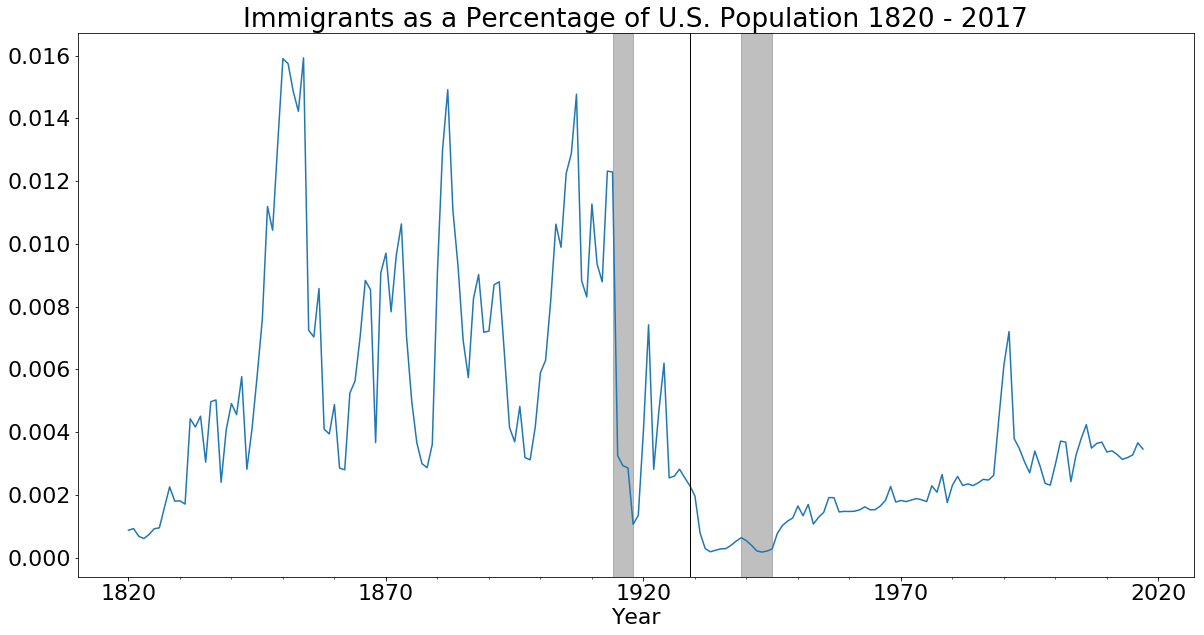

In [9]:
total_immigration.plot(figsize = (20,10),title= 'Immigrants as a Percentage of U.S. Population 1820 - 2017', legend= False)
plt.axvline(pd.to_datetime('1929-10-29'), color='black', linestyle='-', lw=1)

plt.axvspan(pd.to_datetime('1939-09-01'), pd.to_datetime('1945-09-01'), alpha=0.5, color='grey')
plt.axvspan(pd.to_datetime('1914-07-28'), pd.to_datetime('1918-11-11'), alpha=0.5, color='grey')

# Histogram - Immigrants as Percentage of US Pop

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f38b978>]],
      dtype=object)

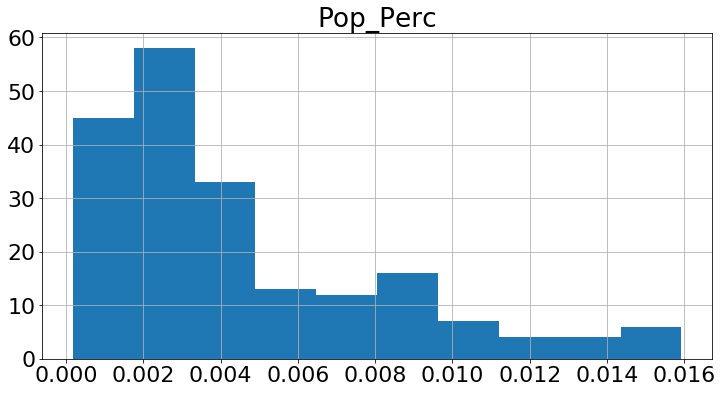

In [10]:
#not informative
total_immigration.hist(figsize = (12,6))

# Kernel Density Estimate plot 

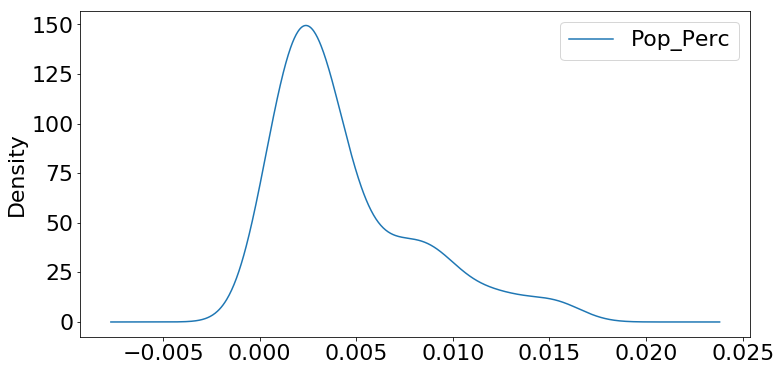

In [11]:
total_immigration.plot(kind='kde', figsize = (12,6))

# Graphing Rolling Mean and SD - window = 6

## Question to research:
- Which window to use? The more windows, the shorter the rolling mean and SD graphed

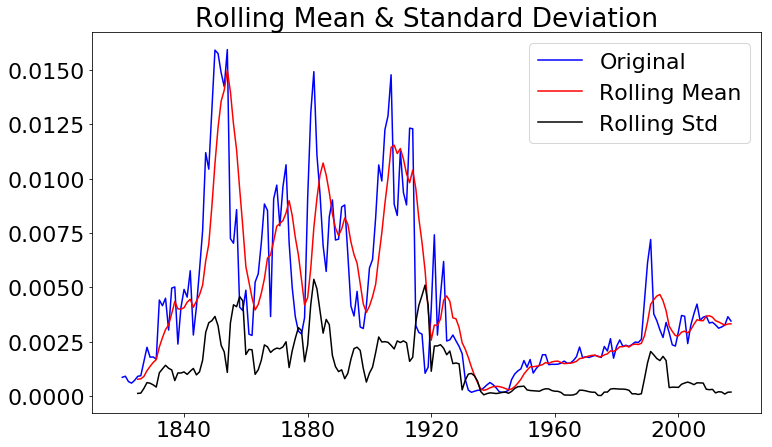

In [12]:
rolmean = total_immigration.rolling(window = 6, center = False).mean()
rolstd = total_immigration.rolling(window = 6, center = False).std()
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Dickey-Fuller Test

## Question to research:
- How to interpret the Dickey Fuller numbers? / Results of Dickey-Fuller Test?

In [9]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(total_immigration)
# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value
# print(dftest)

# Checking to see if stationary

## 1. Function to check for Stationarity and Graph
### - Rolling Mean and SD with window = 32
### - Plot results of DF Test

In [16]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 32, center = False).mean()
    rolstd = TS.rolling(window = 32, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Pop_Perc']) 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(20,10))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput2['Critical Value (%s)'%key] = value
    print (dfoutput2)

# 2. Run first stationairty check on initial data
### Results of Dickey-Fuller Test:
#### p-value          =                 0.046983

In [17]:
#created a function to quickly process ts for stationarity check function
def clean_for_stat_check(ts):
    ts_df = ts.to_frame()
    ts_df = ts_df.rename(index=str, columns={0:'Number'})
    return ts_df

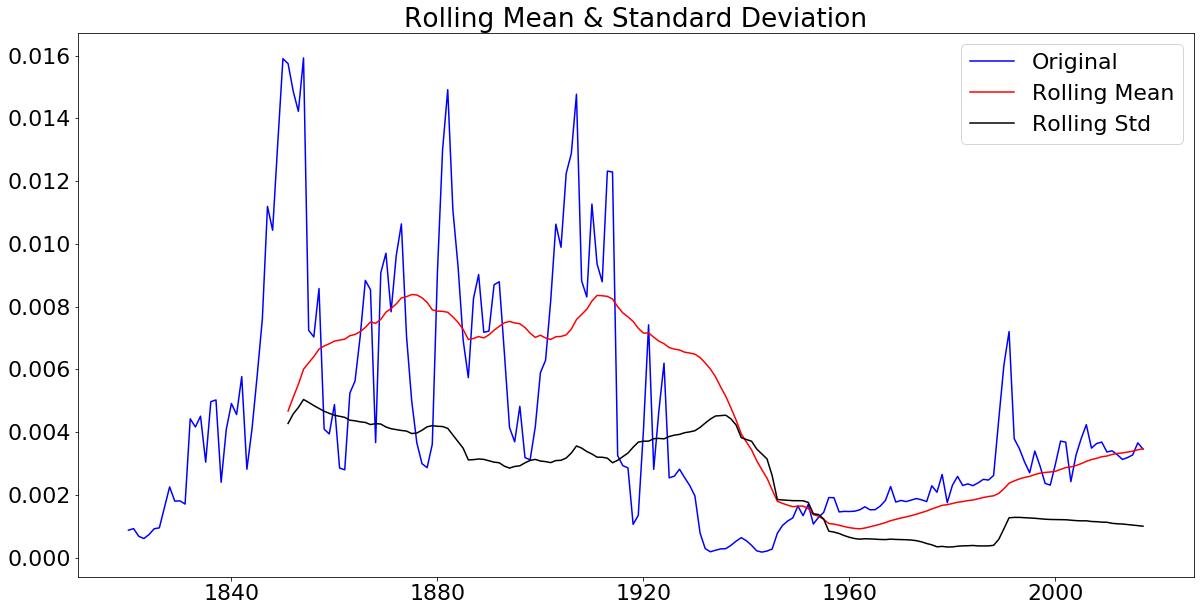

Results of Dickey-Fuller Test:
Test Statistic                  -2.886149
p-value                          0.046983
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [18]:
stationarity_check(total_immigration)

# 3. Log transformation to minimize non-stationarity
### Results of Dickey-Fuller Test:
#### P-value went up to 0.193294

In [16]:
import numpy as np
index = total_immigration.index

In [17]:
type(total_immigration)

pandas.core.frame.DataFrame

In [19]:
test = total_immigration.Pop_Perc
type(test)

pandas.core.series.Series

In [20]:
immigration_array = test.as_matrix() #convert to numpy array
# immigration_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
log = pd.Series(np.log(immigration_array), index=index)
# data

Text(0, 0.5, 'log(Pop_perc_by_year)')

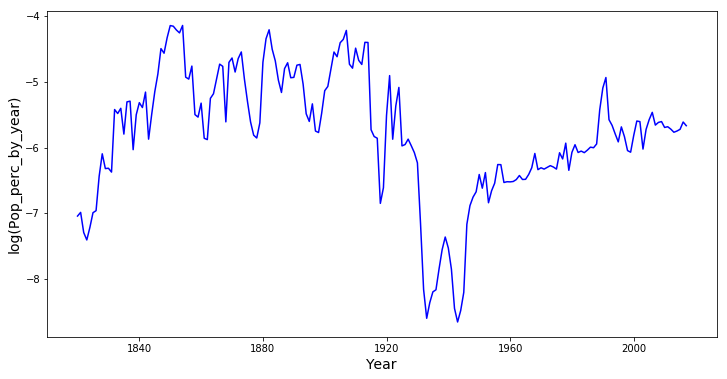

In [26]:
fig = plt.figure(figsize=(12,6))
plt.plot(log, color="blue")
plt.xlabel("Year", fontsize=14)
plt.ylabel("log(Pop_perc_by_year)", fontsize=14)
# plt.show()

In [32]:
log_df = log.to_frame()
log_df = log_df.rename(index=str, columns={0:'Pop_Perc'})
# data_df

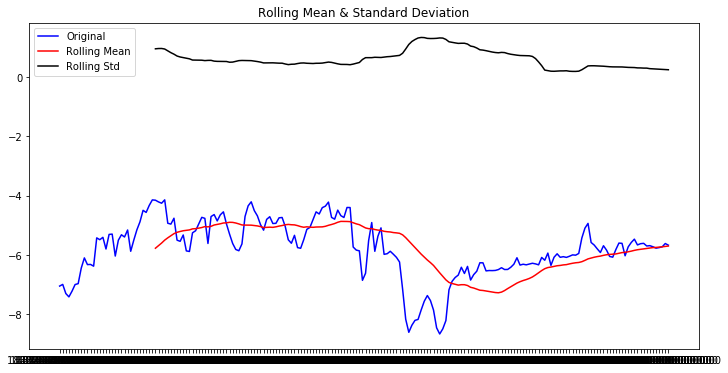

Results of Dickey-Fuller Test:
Test Statistic                  -2.236420
p-value                          0.193294
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [35]:
stationarity_check(log_df)

# 4. Square Root transformation to minimize non-stationarity
#### P-val did not improve

Text(0, 0.5, 'sqrt(total_immigration)')

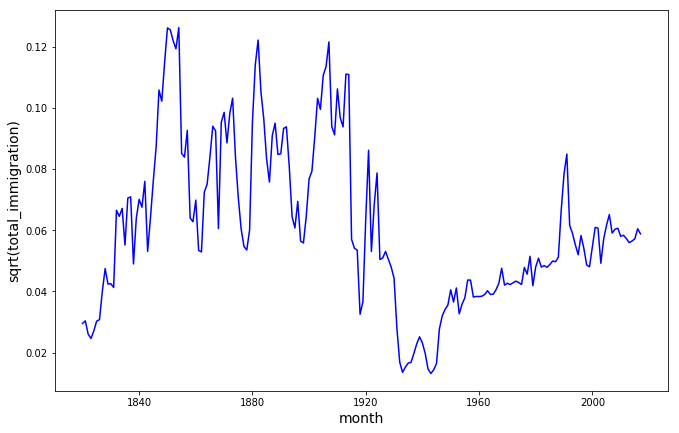

In [36]:
data_sqrt = pd.Series(np.sqrt(immigration_array), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data_sqrt, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("sqrt(total_immigration)", fontsize=14)


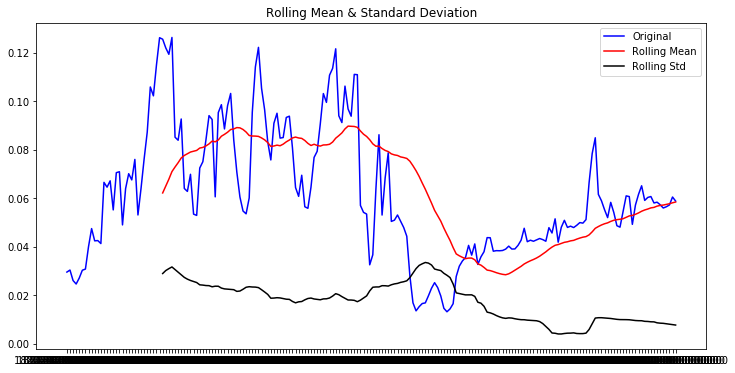

Results of Dickey-Fuller Test:
Test Statistic                  -2.503944
p-value                          0.114518
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [38]:
data_sqrt_df = data_sqrt.to_frame()
data_sqrt_df = data_sqrt_df.rename(index=str, columns={0:'Pop_Perc'})

stationarity_check(data_sqrt_df)

# 5. Subtracting the rolling mean
## P-values are excellent - this is the WINNER

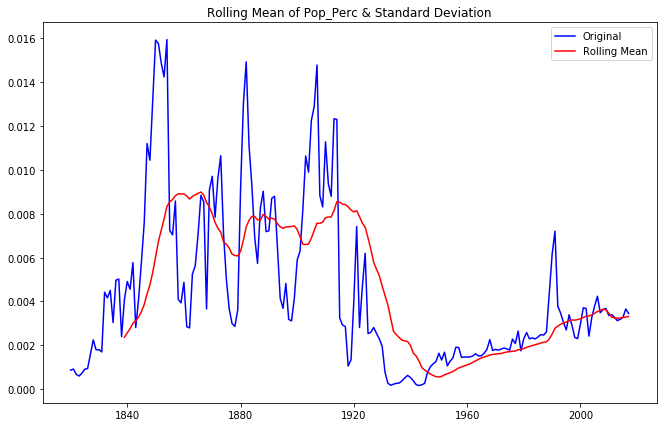

In [43]:
rolmean = total_immigration.rolling(window = 20).mean()
fig = plt.figure(figsize=(11,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean of Pop_Perc')
plt.show(block=False)

In [40]:
data_minus_rolmean = total_immigration - rolmean
# data_minus_rolmean.head(15)

In [41]:
data_minus_rolmean.dropna(inplace=True)

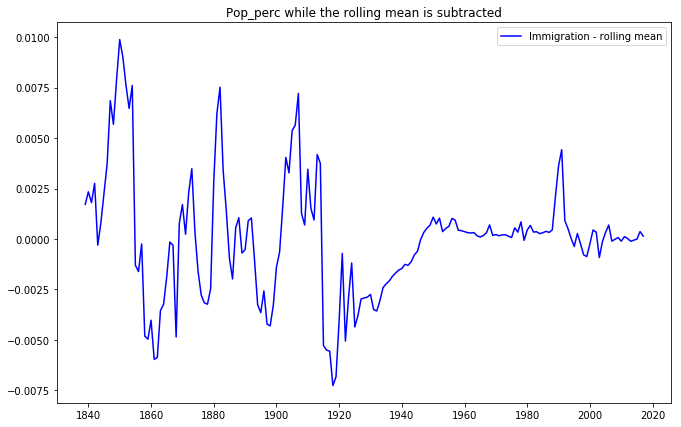

In [44]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Pop_perc while the rolling mean is subtracted')
plt.show(block=False)

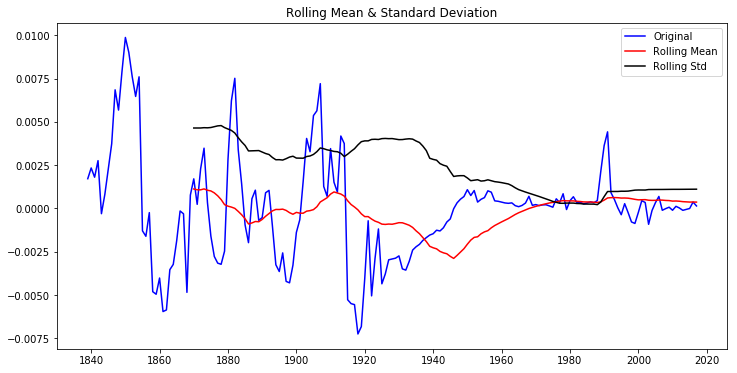

Results of Dickey-Fuller Test:
Test Statistic                  -4.373808
p-value                          0.000330
#Lags Used                       7.000000
Number of Observations Used    171.000000
Critical Value (1%)             -3.469181
Critical Value (5%)             -2.878595
Critical Value (10%)            -2.575863
dtype: float64


In [45]:
stationarity_check(data_minus_rolmean)

# 6. The weighted rolling mean / weighted moving average
- More recent values are given a higher weight
- Below using Exponentially Weighted Moving Average where weights are assigned to all the previous values with an exponential decay factor
    - the parameter ‘halflife’ is used to define the amount of exponential decay. 
    - Other parameters like span and center of mass can also be used to define decay
    - more info: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html

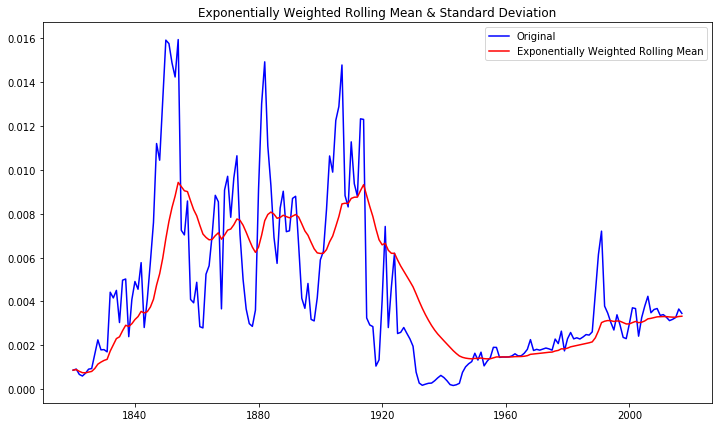

In [46]:
exp_rolmean = total_immigration.ewm(halflife = 8).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(total_immigration, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

# 7. Subtract the Exponentially Weighted Moving Average from the Original Data

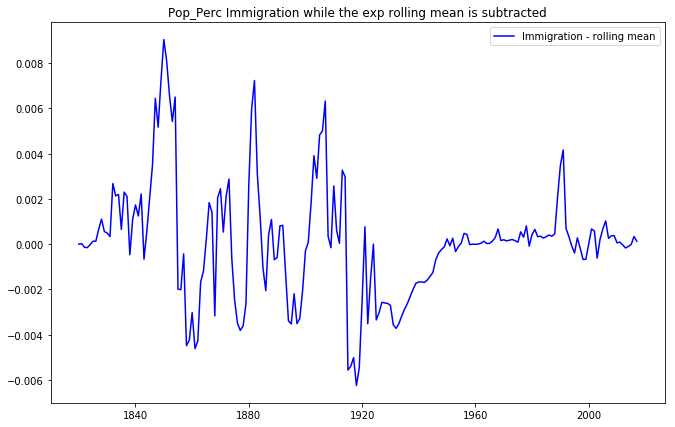

In [48]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = total_immigration - exp_rolmean
data_minus_exp_rolmean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_rolmean, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Pop_Perc Immigration while the exp rolling mean is subtracted')
plt.show(block=False)

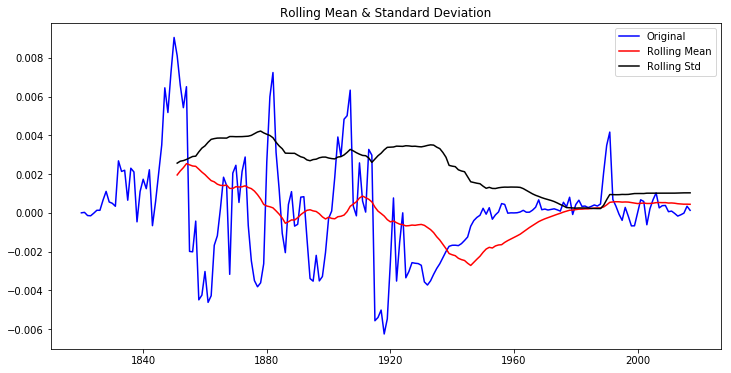

Results of Dickey-Fuller Test:
Test Statistic                  -4.306517
p-value                          0.000433
#Lags Used                       7.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [49]:
stationarity_check(data_minus_exp_rolmean)

# Differencing
- deal with both trend and seasonality 
- take the difference of an observation at a particular time instant with that at the previous instant (i.e. a co-called 1-period "lag")

# 8.Use the new data where exp rolling mean is subtracted and difference it by 20 periods

In [50]:
#twelve period lag
data_diff = data_minus_exp_rolmean.diff(periods=20)
data_diff.tail(20)

,Pop_Perc
Year,
1998-01-01,-0.001477
1999-01-01,-0.000583
2000-01-01,-0.000426
2001-01-01,0.000022
2002-01-01,0.000254
2003-01-01,-0.000966
2004-01-01,-0.000060
2005-01-01,0.000344
2006-01-01,0.000623


In [51]:
data_diff.notnull().sum()

Pop_Perc    178
dtype: int64

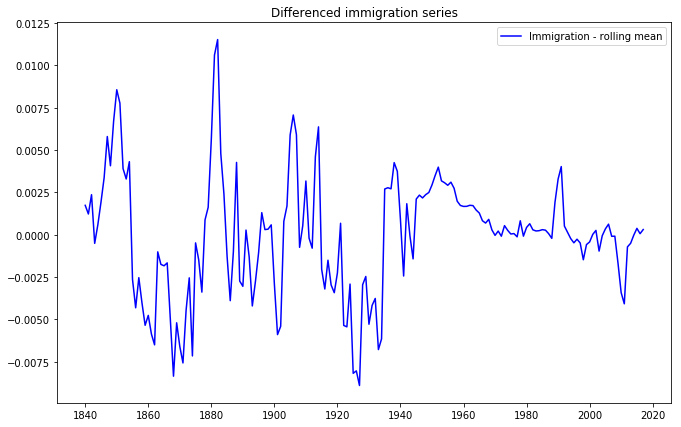

In [52]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)

In [53]:
data_droppedna= data_diff.dropna()


In [103]:
# data_droppedna#

In [54]:
# data_diff = data_droppedna.to_frame()
data_diff = data_droppedna.rename(index=str, columns={0:'Number'})
# data_diff

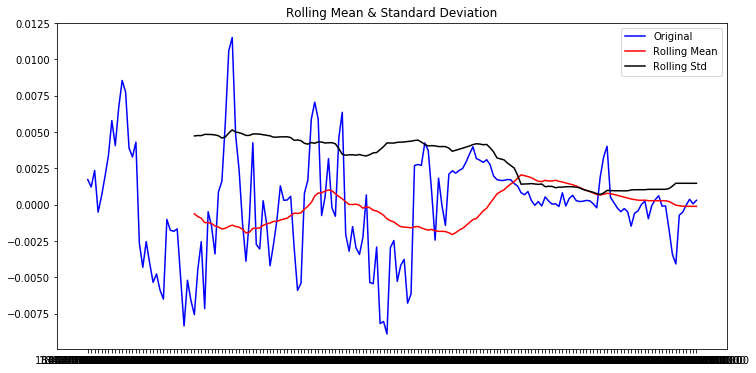

Results of Dickey-Fuller Test:
Test Statistic                  -3.378381
p-value                          0.011718
#Lags Used                      13.000000
Number of Observations Used    164.000000
Critical Value (1%)             -3.470866
Critical Value (5%)             -2.879330
Critical Value (10%)            -2.576255
dtype: float64


In [55]:
stationarity_check(data_diff)

# 9. Use the data where rolling mean is subtracted and difference it by 20 periods

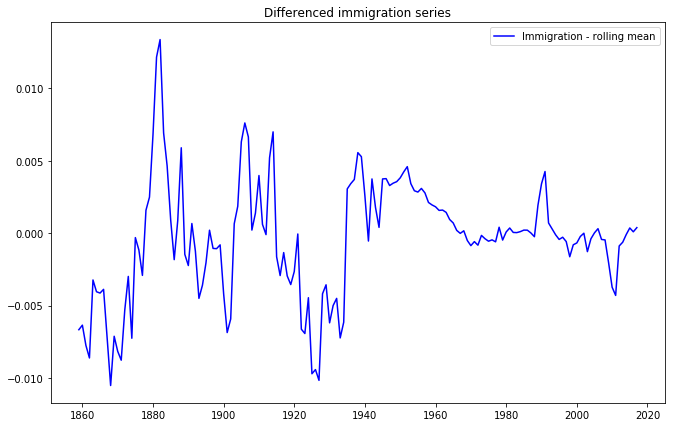

In [56]:

data_diff2 = data_minus_rolmean.diff(periods=20)
fig = plt.figure(figsize=(11,7))
plt.plot(data_diff2, color='blue',label='Immigration - rolling mean')
plt.legend(loc='best')
plt.title('Differenced immigration series')
plt.show(block=False)


In [57]:
data_droppedna2= data_diff2.dropna()

In [58]:
data_diff2 = data_droppedna2.rename(index=str, columns={0:'Number'})
# data_diff

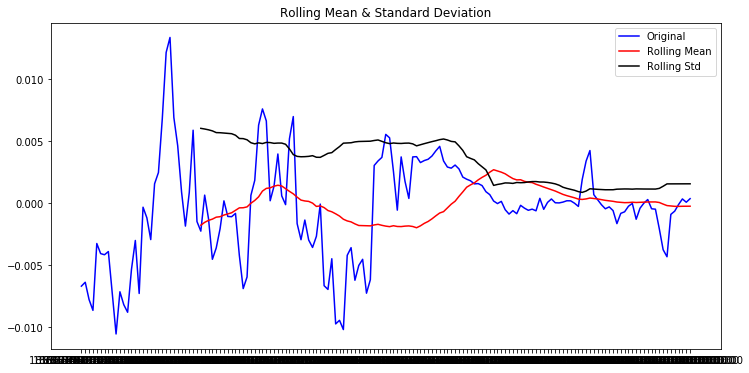

Results of Dickey-Fuller Test:
Test Statistic                  -3.474540
p-value                          0.008666
#Lags Used                      14.000000
Number of Observations Used    144.000000
Critical Value (1%)             -3.476598
Critical Value (5%)             -2.881829
Critical Value (10%)            -2.577589
dtype: float64


In [59]:
stationarity_check(data_diff2)